## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images, and extract the object points and images points

## Compute camera calibration and distortion correction for chessboard images

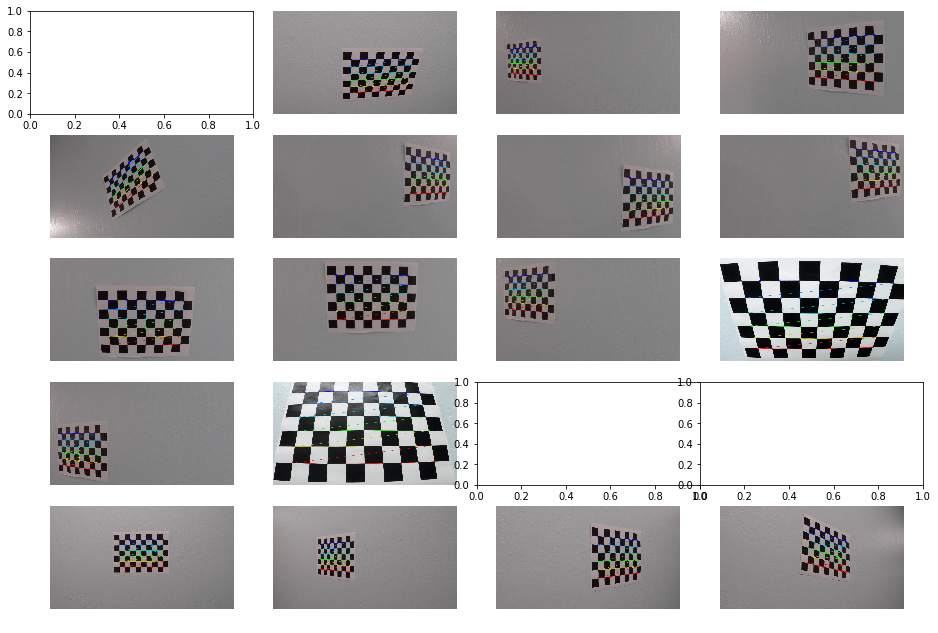

In [61]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
nx=9
ny=6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)
        #plt.imshow('img',img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()


## Undistort and unwarp the images using camera calibration and perspective transform for Chessboards
### - In this section, objection points and image points are calculated based on a set of chessboard images, and then compute camera matrix and distortion coefficients using cv2.calibrateCamera
### - Using perspective transform to get the "bird view" image

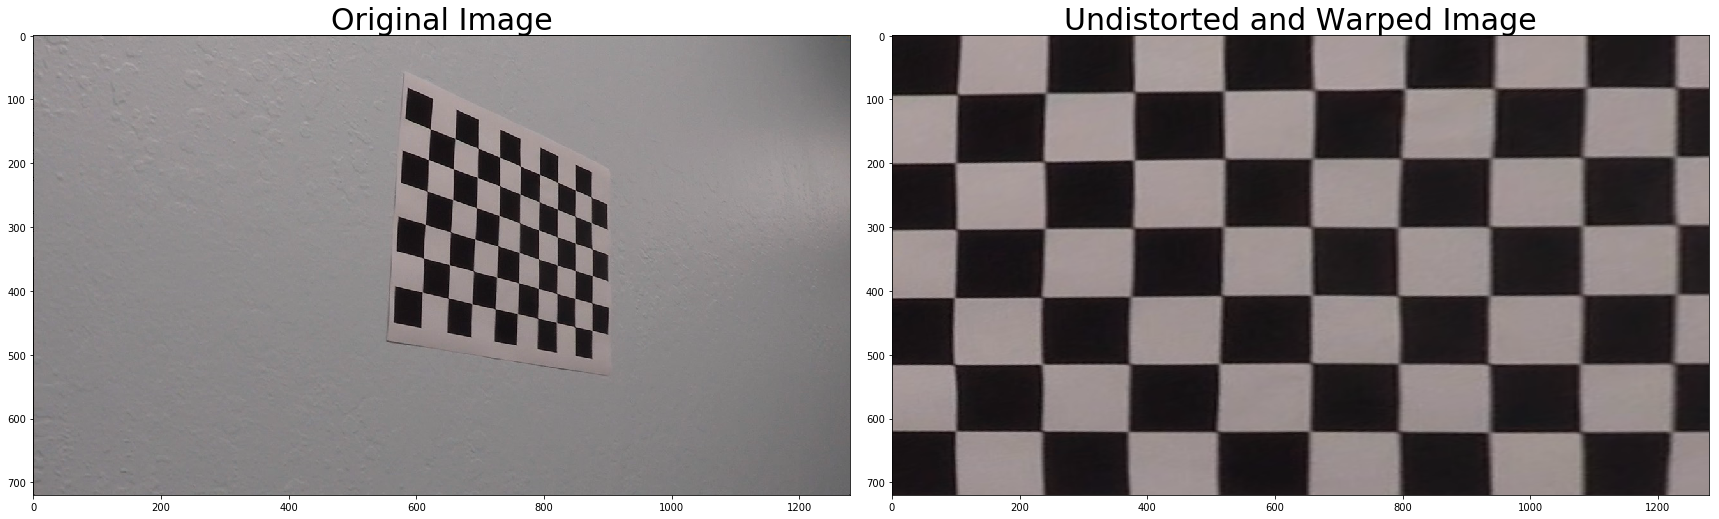

In [60]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
nx=9
ny=6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')
img=cv2.imread(images[19])
img=np.array(img)

## Define the function for image unwarp
def Unwarp_img(img, nx, ny):
        # Find the chessboard corners
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners=cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

        undist = cv2.undistort(img, mtx, dist, None, mtx)
        offset=100 
        img_size=(gray.shape[1],gray.shape[0])
        src=np.float32([corners[0,:,:], corners[nx-1,:,:],corners[-1,:,:],corners[-nx,:,:]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)
    return warped, M

warped_img, perspective_M=Unwarp_img(img, nx, ny)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped_img)
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.savefig('Undistorted_Warped_Image.png')


# Pipeline for Lane detection on images

#### Apply Camera calibration, distortion correction, color&gradients threshold and perspective transforms to the raw testing images
In this section, all images can be undistorted by using camera calibration parameters, and define a user-defined function, in which camera parameters and all distortion coefficients are obtained for each of single image


This image is: <class 'numpy.ndarray'> with dimensions of (720, 1280, 3)


Text(0.5,1,'Undistorted Image')

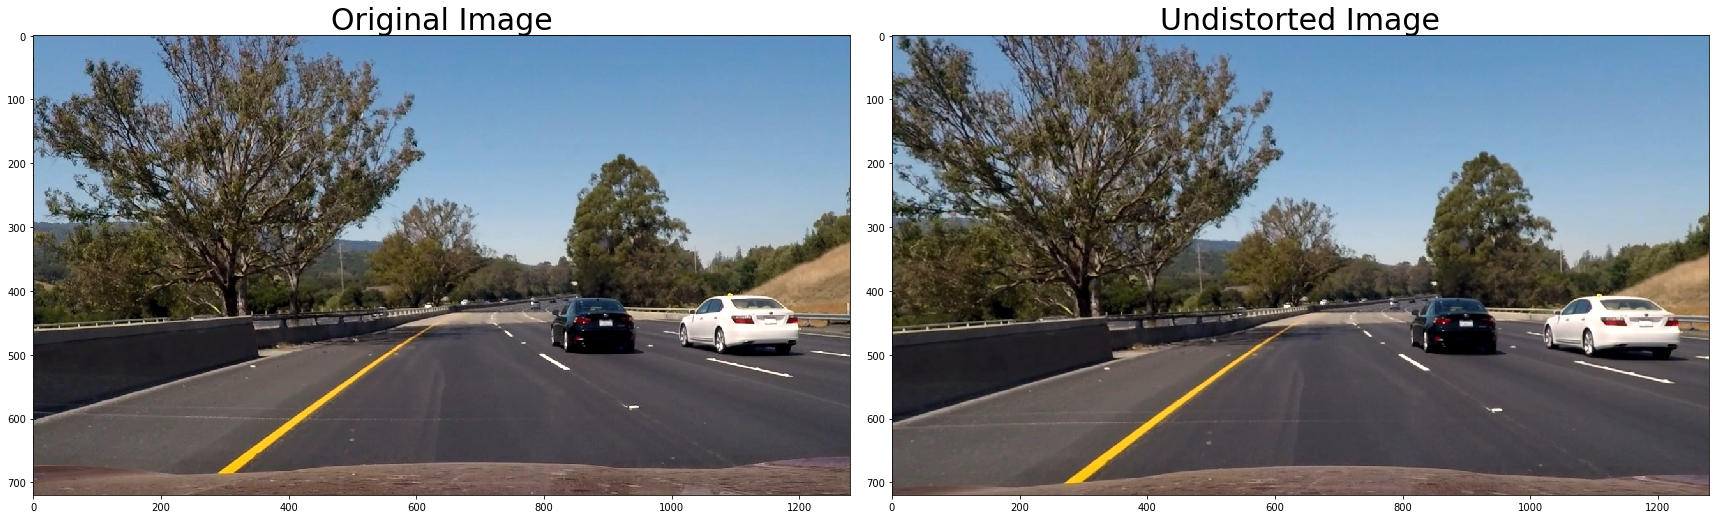

In [55]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
## Apply Camera calibration, distortion correction
def camera_calibration():
    nx=9
    ny=6
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
    images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
    for fname in images:
        img_chess = cv2.imread(fname)
        gray_chess = cv2.cvtColor(img_chess,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray_chess, (9,6),None)
    

    # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    shape=gray_chess.shape[::-1]
    np.save('objpoints', objpoints)
    np.save('imgpoints', imgpoints)
    np.save('shape', shape)
    
    return None
## Apply Camera calibration, distortion correction
def undistortion(img):
# Arrays to store object points and image points from all the images.
    objpoints = np.load('objpoints.npy') # 3d points in real world space
    imgpoints = np.load('imgpoints.npy') # 2d points in image plane.
    shape=tuple(np.load('shape.npy'))
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,shape,None, None)
    undist=cv2.undistort(img, mtx, dist, None, mtx)
    return undist  

# read an image from a folder
#img=mpimg.imread('solidYellowCurve2.jpg')
img=cv2.imread('../test_images/test6.jpg')
b,g,r=cv2.split(img)
img=cv2.merge([r,g,b])
original_img=img
# print out some info about this image
#img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print ('This image is:', type(img),'with dimensions of',img.shape)

# transform from color to gray scale
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #mpimg loads image as RGB
dst=undistortion(img)
f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
  

#### Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.
I used a combination of color and gradient thresholds to generate a binary image, Here's an example of my output for this step. 

Text(0.5,1,'gradient threshold')

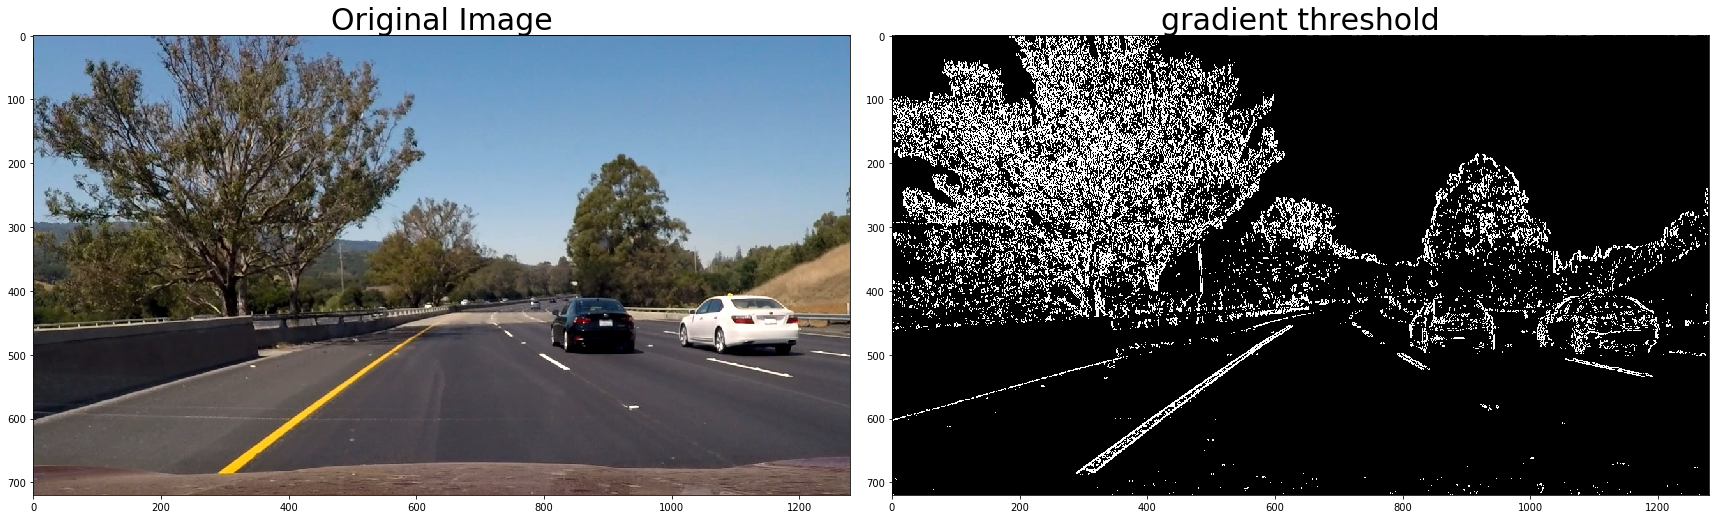

In [56]:
thresh_grad_min = 20
thresh_grad_max = 100
color_thre_min, color_thre_max=170, 255
## Define Color & gradients function
def gradient_threshold(img, thresh_grad_min, thresh_grad_max, color_thre_min, color_thre_max):
    hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel=hls[:,:,2]
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    ## Sobelx
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_grad_min) & (scaled_sobel <= thresh_grad_max)] = 1
    
    # Color threshold
    s_binary=np.zeros_like(s_channel)
    s_binary[(s_channel>=color_thre_min)&(s_channel<color_thre_max)]=1
    # stack each channel to an image to see the contribution of individual channels
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    # combine two binary thresholds
    combined_binary=np.zeros_like(s_binary)
    combined_binary[(sxbinary==1)|(s_binary==1)]=1
    return  combined_binary
out=gradient_threshold(img, thresh_grad_min, thresh_grad_max, color_thre_min, color_thre_max)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(out, cmap='gray')
ax2.set_title('gradient threshold', fontsize=30)
  

#### Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.
The code for my perspective transform includes a function called `warped_img()`, which appears in lines 1 through 15 in the IPython notebook block below.  The `warped_img()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 580, 460      | 200, 0        | 
| 700, 460      | 1000, 0       |
| 1040, 680     | 1000,720      |
| 260, 680      | 200, 720      |

```python
src=np.float32([[580,460],[700,460],[1040,680],[260,680]])
dst = np.array([[200, 0], [1000, 0], [1000, img.shape[0]], [200, img.shape[0]]], np.float32)
```
I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

Text(0.5,1,'Warped image')

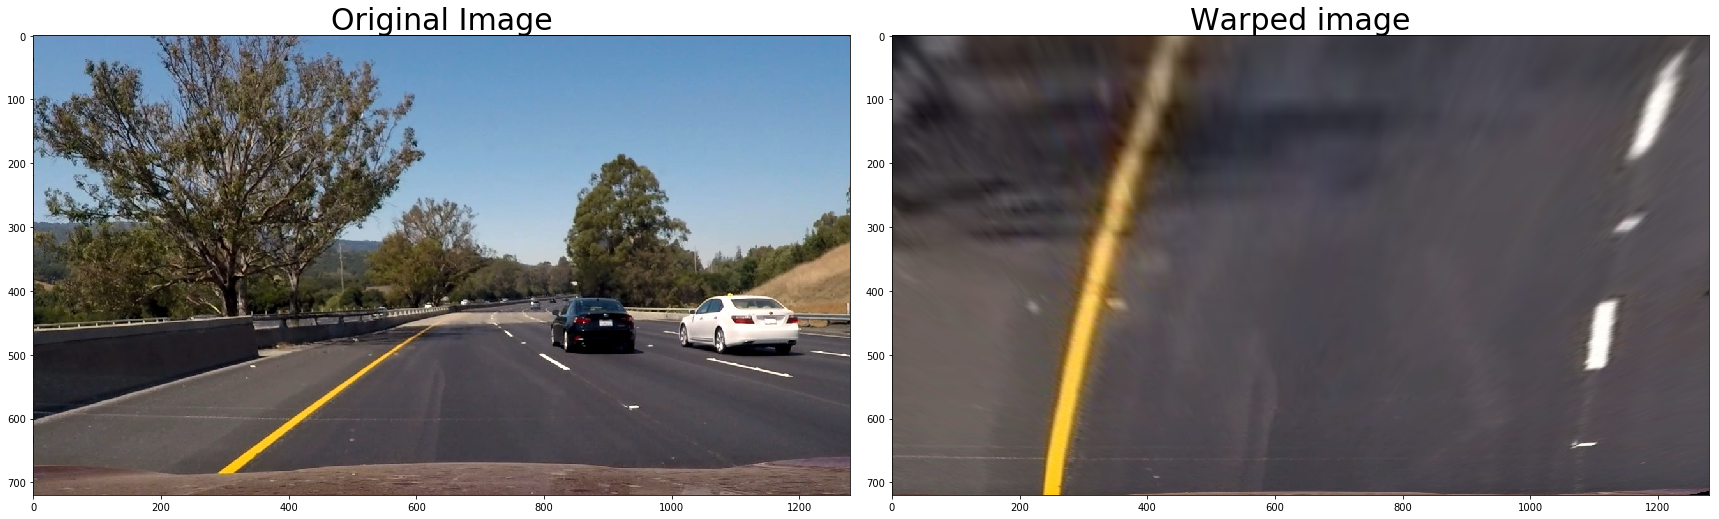

In [57]:
## Perspective transform
## Define the function for image unwarp
def warped_img(img):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_size=(gray.shape[1],gray.shape[0])
    #src=np.float32([[500,500],[780,500],[img.shape[1],img.shape[0]],[150,img.shape[0]]])
    src=np.float32([[580,460],[700,460],[1040,680],[260,680]])
    dst = np.array([[200, 0], [1000, 0], [1000, img.shape[0]], [200, img.shape[0]]], np.float32)
# Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    return warped, M, Minv
img_warped, M, Minv=warped_img(img)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(img_warped)
ax2.set_title('Warped image', fontsize=30)
    

#### Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?
I did this in the IPython notebook block below. 
As for curvature measurement, I took the average of left and right lane curvatures. 

Text(0.5,1,'warped binary')

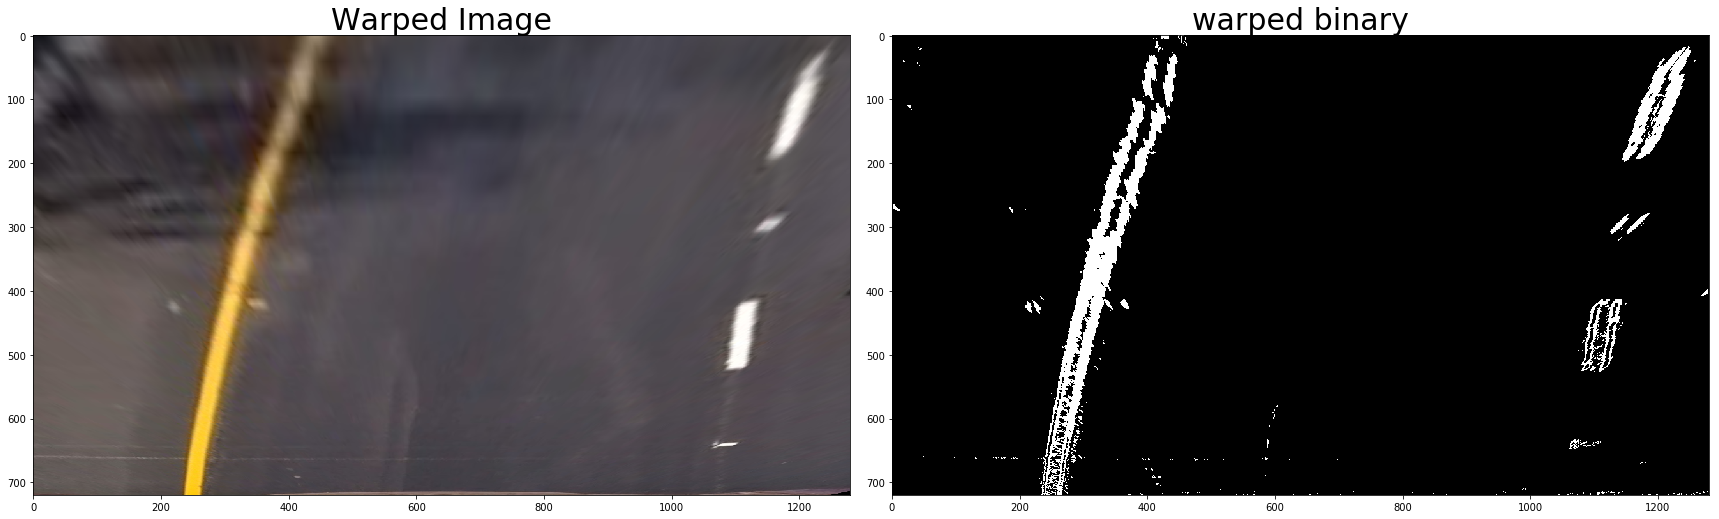

In [58]:
## Define the function of detecting lane lines

def find_lines(binary):
    # calculate the current base leftx and rightx pixels location
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    leftx_current=leftx_base
    rightx_current=rightx_base
    out_img=np.dstack((binary, binary, binary))
    # nonzero x & y locations
    nonzerox=np.array(binary.nonzero()[1])
    nonzeroy=np.array(binary.nonzero()[0])
    # left and right lane lines indices
    leftx_ind, rightx_ind=[],[]
    # Hyper parameters for windows
    nwindow=9
    margin=100
    minpxl=50
    
    for window in range(nwindow):
        # define the parameters of windwos on image
        win_height=np.int(image_height//nwindow)
        win_y_low=image_height-(window+1)*win_height
        win_y_high=image_height-window*win_height
        win_left_low=leftx_current-margin
        win_left_high=leftx_current+margin
        win_right_low=rightx_current-margin
        win_right_high=rightx_current+margin
        
        # identify the nonzero pixels within the window
        detected_leftx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_left_low) &  (nonzerox < win_left_high)).nonzero()[0]
        
        detected_rightx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_right_low) &  (nonzerox < win_right_high)).nonzero()[0]
        
        if len(detected_leftx_ind)>minpxl:
            leftx_current=np.int(np.mean(nonzerox[detected_leftx_ind]))
        if len(detected_rightx_ind)>minpxl:
            rightx_current=np.int(np.mean(nonzerox[detected_rightx_ind]))
        leftx_ind.append(detected_leftx_ind)
        rightx_ind.append(detected_rightx_ind)
    try:
        leftx_ind=np.concatenate(leftx_ind)
        rightx_ind=np.concatenate(rightx_ind)
    except ValueErrors:
        
        pass
    
    leftx=nonzerox[leftx_ind]
    rightx=nonzerox[rightx_ind]
    lefty=nonzeroy[leftx_ind]
    righty=nonzeroy[rightx_ind]
    
    return leftx, lefty, rightx, righty, out_img

# define polynomial function of lane lines

def polynomial_fit(binary, Minv):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lines(binary)
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary.shape[0]-1, binary.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary.shape[1], binary.shape[0])) 
    

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    return out_img, newwarp

def curvature_cal(binary):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lines(binary)
    # covert x, y from pixels to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    lane_center=np.int((leftx_base+rightx_base)//2)
    img_center=np.int(image_width//2)
    Veh_pos=np.float32((img_center-lane_center)*xm_per_pix)  # calculate the vehicel position, left '-', right off center '+'
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary.shape[0]-1, binary.shape[0] )
    y_eval=np.max(ploty)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    lane_curverad=(left_curverad+right_curverad)/2

    return lane_curverad, Veh_pos

warped_binary=gradient_threshold(img_warped, thresh_grad_min, thresh_grad_max, color_thre_min, color_thre_max)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img_warped)
ax1.set_title('Warped Image', fontsize=30)
ax2.imshow(warped_binary, cmap='gray')
ax2.set_title('warped binary', fontsize=30)

    
    
    

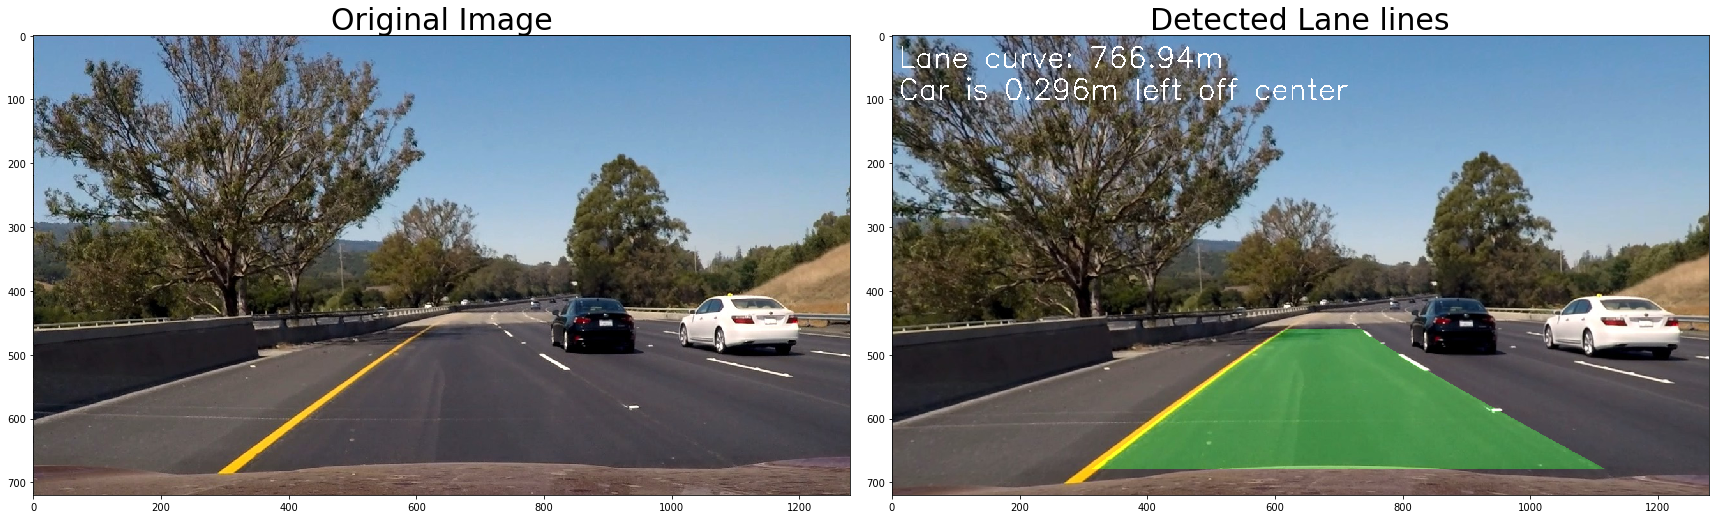

In [59]:
def process_image(img):
    # print out some info about this image
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # transform from color to gray scale
    #b,g,r=cv2.split(img)
    #img=cv2.merge([r,g,b])
    img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #mpimg loads image as RGB
    # Apply Gaussian smoothing 
    #kernel_size=5
    #blur_gray=cv2.GaussianBlur(img_gray,(kernel_size,kernel_size),0,0)
    # Undistort the image

    undistort_img=undistortion(img)
    #color & gradients threshold
    img_warped, perspective_M, Minv=warped_img(undistort_img)
    warped_binary=gradient_threshold(img_warped, thresh_grad_min, thresh_grad_max, color_thre_min, color_thre_max)

    out_img, newwarp=polynomial_fit(warped_binary,Minv)
    lane_curverad, Veh_pos=curvature_cal(warped_binary)
    # Combine the result with the original image
    result = cv2.addWeighted(undistort_img, 1, newwarp, 0.3, 0)
    if Veh_pos > 0:
        car_pos_text = "{:04.2f}m right off center".format(Veh_pos)
    else:
        car_pos_text = '{:04.3f}m left off center'.format(abs(Veh_pos))

    cv2.putText(result, "Lane curve: {:04.2f}m".format(lane_curverad), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5,
                color=(255, 255, 255), thickness=2)
    cv2.putText(result, "Car is {}".format(car_pos_text), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color=(255, 255, 255),
                thickness=2)

    return result


det_img=process_image(original_img)

f, (ax1, ax2)=plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(det_img)
ax2.set_title('Detected Lane lines', fontsize=30)
plt.savefig('../output_images/test6')

## Pipeline (Video)
#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).
Here's a [https://youtu.be/tJ2cSO0wDSM](./project_video.mp4)

In [ ]:
# importing some useful packages
#from moviepy.editor import VideoFileClip
import imageio
imageio.plugins.ffmpeg.download()
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2
import os
from moviepy.editor import VideoFileClip
import glob

## Apply Camera calibration, distortion correction
def undistortion(img):
# Arrays to store object points and image points from all the images.
    objpoints = np.load('objpoints.npy') # 3d points in real world space
    imgpoints = np.load('imgpoints.npy') # 2d points in image plane.
    shape=tuple(np.load('shape.npy'))
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,shape,None, None)
    undist=cv2.undistort(img, mtx, dist, None, mtx)
    return undist

thresh_grad_min = 20
thresh_grad_max = 100
color_thre_min, color_thre_max=170, 255
## Define Color & gradients function
def gradient_threshold(img, thresh_grad_min, thresh_grad_max, color_thre_min, color_thre_max):
    hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel=hls[:,:,2]
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    ## Sobelx
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_grad_min) & (scaled_sobel <= thresh_grad_max)] = 1
    
    # Color threshold
    s_binary=np.zeros_like(s_channel)
    s_binary[(s_channel>=color_thre_min)&(s_channel<color_thre_max)]=1
    # stack each channel to an image to see the contribution of individual channels
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    # combine two binary thresholds
    combined_binary=np.zeros_like(s_binary)
    combined_binary[(sxbinary==1)|(s_binary==1)]=1
    return  combined_binary

## Perspective transform
## Define the function for image unwarp
def warped_img(img):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_size=(gray.shape[1],gray.shape[0])
    #src=np.float32([[500,500],[780,500],[img.shape[1],img.shape[0]],[150,img.shape[0]]])
    src=np.float32([[580,460],[700,460],[1040,680],[260,680]])
    dst = np.array([[200, 0], [1000, 0], [1000, img.shape[0]], [200, img.shape[0]]], np.float32)
# Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    return warped, M, Minv

## Define the function of detecting lane lines

def find_lines(binary):
    # calculate the current base leftx and rightx pixels location
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    leftx_current=leftx_base
    rightx_current=rightx_base
    out_img=np.dstack((binary, binary, binary))
    # nonzero x & y locations
    nonzerox=np.array(binary.nonzero()[1])
    nonzeroy=np.array(binary.nonzero()[0])
    # left and right lane lines indices
    leftx_ind, rightx_ind=[],[]
    # Hyper parameters for windows
    nwindow=9
    margin=100
    minpxl=50
    
    for window in range(nwindow):
        # define the parameters of windwos on image
        win_height=np.int(image_height//nwindow)
        win_y_low=image_height-(window+1)*win_height
        win_y_high=image_height-window*win_height
        win_left_low=leftx_current-margin
        win_left_high=leftx_current+margin
        win_right_low=rightx_current-margin
        win_right_high=rightx_current+margin
        
        # identify the nonzero pixels within the window
        detected_leftx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_left_low) &  (nonzerox < win_left_high)).nonzero()[0]
        
        detected_rightx_ind=((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_right_low) &  (nonzerox < win_right_high)).nonzero()[0]
        
        if len(detected_leftx_ind)>minpxl:
            leftx_current=np.int(np.mean(nonzerox[detected_leftx_ind]))
        if len(detected_rightx_ind)>minpxl:
            rightx_current=np.int(np.mean(nonzerox[detected_rightx_ind]))
        leftx_ind.append(detected_leftx_ind)
        rightx_ind.append(detected_rightx_ind)
    try:
        leftx_ind=np.concatenate(leftx_ind)
        rightx_ind=np.concatenate(rightx_ind)
    except ValueErrors:
        
        pass
    
    leftx=nonzerox[leftx_ind]
    rightx=nonzerox[rightx_ind]
    lefty=nonzeroy[leftx_ind]
    righty=nonzeroy[rightx_ind]
    
    return leftx, lefty, rightx, righty, out_img

# define polynomial function of lane lines

def polynomial_fit(binary, Minv):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lines(binary)
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary.shape[0]-1, binary.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary.shape[1], binary.shape[0])) 
    

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    return out_img, newwarp

def curvature_cal(binary):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lines(binary)
    # covert x, y from pixels to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    image_height=binary.shape[0]
    image_width=binary.shape[1]
    histogram=np.sum(binary[binary.shape[0]//2:,:], axis=0)
    midpoint=np.int(binary.shape[1]//2)
    leftx_base=np.argmax(histogram[:midpoint])           # define the base left lanes location
    rightx_base=np.argmax(histogram[midpoint:])+midpoint  # define the base right lanes location
    lane_center=np.int((leftx_base+rightx_base)//2)
    img_center=np.int(image_width//2)
    Veh_pos=np.float32((img_center-lane_center)*xm_per_pix)  # calculate the vehicel position, left '-', right off center '+'
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary.shape[0]-1, binary.shape[0] )
    y_eval=np.max(ploty)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    lane_curverad=(left_curverad+right_curverad)/2

    return lane_curverad, Veh_pos

def process_image(img):
    # print out some info about this image
    #img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # transform from color to gray scale
    #b,g,r=cv2.split(img)
    #img=cv2.merge([r,g,b])
    img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #mpimg loads image as RGB
    # Apply Gaussian smoothing 
    #kernel_size=5
    #blur_gray=cv2.GaussianBlur(img_gray,(kernel_size,kernel_size),0,0)
    # Undistort the image

    undistort_img=undistortion(img)
    #color & gradients threshold
    img_warped, perspective_M, Minv=warped_img(undistort_img)
    warped_binary=gradient_threshold(img_warped, thresh_grad_min, thresh_grad_max, color_thre_min, color_thre_max)

    out_img, newwarp=polynomial_fit(warped_binary,Minv)
    lane_curverad, Veh_pos=curvature_cal(warped_binary)
    # Combine the result with the original image
    result = cv2.addWeighted(undistort_img, 1, newwarp, 0.3, 0)
    if Veh_pos > 0:
        car_pos_text = "{:04.2f}m right off center".format(Veh_pos)
    else:
        car_pos_text = '{:04.3f}m left off center'.format(abs(Veh_pos))

    cv2.putText(result, "Lane curve: {:04.2f}m".format(lane_curverad), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5,
                color=(255, 255, 255), thickness=2)
    cv2.putText(result, "Car is {}".format(car_pos_text), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color=(255, 255, 255),
                thickness=2)

    return result





In [ ]:
from IPython.display import HTML
white_output = 'final_result.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("../project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)  

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))




### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  

I basically used all techniques that were dicussed in the lectures, such as camera calibration, distortion correction, perspective transforms, as well as color & gradients threshold, etc. However, although all techiques that I have adopted and applied for my lane detection algorithms are not quite robust, especially when it came into some shadow condition, and dirty roads as well as discoration, my algorithms sometimes failed at those condition. I hope to revise those strategies in the future.